<center><h1>Predictive Modeling: Logistic Regression - Churn Data - D208<br>
Jessenia Lorenzo<br>
Western Governor's University<br>
__________________________________________________________________________________________________________</h1></center>

# Part 1

The objective of this analysis is to see what is the relationship between customer churn based on the predictor variables gender, income, age, children, bandwidth gb year, yearly equipment failure, outage sec per week, and monthly charge, and which are the most significant in predicting churn? Churn, in terms of the Telecom industry, is defined as the percentage of subscribers that move from one specific service or provider to another in a certain period of time. In other words, it is the rate at which customers stop their services with a provider. Perhaps the main causes may be that companies waste their time or they felt they were being poorly helped by customer service.

# Part 2 

(reference: statology.com)

There are 6 assumptions:
- The response variable is binary (2 possible outcomes)
    - This is simply done by counting how many uniue outcomes occur in the response variable.
    - If in case there were more than 2 outcomes, an ordinal regression would be performed instead.
    - This assumption passed.
- Observations are independent
    - Logistic regression assumes each variables are independent from each other.
    - To check for this assumption, plots are created to observe for random patterns.
    - If there is not a random pattern, assumption may be violated.
    - This assumption failed since there were no random patterns.
- No multicollinearity among the explaratory variables.
    - If there is a high degree of correlation between variables, it can cause problems.
    - VIF can determine this by measuring the correlation and strength of correlation between the predictor variables in the model. 
- No extreme outliers
    - Boxplots are done for this. 
        - If there are outliers, there are options to dealing with them. Some options include removing them, replace them with mean or median, or keeping them, noting them when reporting regression results.
- A linear relationship between explanatory variables and logit of the response variable.
    - plots are created to take a better look 
- The sample size is large enough
    - Check for a minimum of 10 cases with the least frequent outcome for each explanatory variable.
    - This assumption passed.

Tool Benefits:
Benefits of using Python for data analysis include flexibility, ease to learn, it's free and open source, well-supported since it's internationally used, and great for data cleaning, exploration, modeling, machine learning, visualizations, and reporting. In addition, Python has many great tools, packages, and can be used for multiple purposes (reference: statology.com).

Appropriate Technique:
The benefits of logistic regression data analysis: Some benefits include simplicity of implementation, interpretation, and efficiency in training. Furthermore, it can easily be extended to multinomial regression if needed, provides measures of coefficient size and its directionality of association (positive or negative), is efficient in classifying unknown values, is accurate, and can interpret model coefficients to indicate feature importance. Furthermore, logistic regression is used when the chosen Y variables can only takes two values such as 1 and 2, yes and no, etc. Also, it is used when the data is linearly separable to be classified into two independent classes. Lastly, it uses algorithms to classify incoming data using historical data. The algorithms improve more efficiently when newer data constantly comes in (reference: statology.com).

# Part 3

Steps to preparing the data:
- Import the churn dataset file
- Check for missing/null values
- Replace missing/null values, if any, with the mean
- Check that all data types are correct to proceed for the regression and recode categorical variables
- Check the summary statistics of the data (description has been included detail under the code)
- Drop the irrelevant variables that will not be used for the logistic regression
- No null values were found. Success!
- All of the data types turned out to be consistent and fit perfectly for the logistic regression.
- Bivariate and Univariate Distributions (seen below)

List of goals that will be accomplished by these steps:
- Preparing the data enabled me to understand the data better.
- Making sure that there isn't missing data and that imputation is done will allow the data to be a bit more balanced.
- Checking for outliers is essential to avoid variability in a data set, which decreases statistical power. Thus, causing statistically significant results.
- Making sure the data variables were all numeric will allow the computer to correctly interpret the data for analysis.
- Furthermore, numeric data will allow operations, calculations, and analysis to be properly done since is can be read easily.
- Next, a statical summary is important because it tells the person working on the data where the mean is and whether the data is skewed or not.
- Dropping irrelevant variables, or subsetting, is essential because working with a smaller data set means less computational time and complexity.
- Univariate distributions is done to check for the distribution of one variable, and multivariate allows a visual of the relationship of multiple variables.
- To sum it all, the main goal of data preparation is to make the equation coefficients more precise as well as improve the performance of the regression model.


After preparing the data, the steps to begin the analysis are:
- initial model
- reduced model
- export the dataset
- import the new dataset
- confusion matrix
- reduced model equation

(reference: statology.com)

### Importing the libraries 
(reference: statology.org)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

### Reading in and viewing the churn data set

In [2]:
df = pd.read_csv(r'C:\Users\jesse\Documents\WGU\Predictive Modeling\TASK_2_FINAL_Churn\churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Drop columns we will not be using for the analysis, checking for missing data, and mitigating with mean if necessary

In [3]:
df = df.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                      'Population', 'Area', 'TimeZone', 'Job', 'Email', 'Contacts', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                      'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                      'Tenure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'PaymentMethod', 'Marital'])
nulls = df.isnull().any()
print(nulls)

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Yearly_equip_failure    False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool


#### Statistical Summary

In [4]:
df.describe()

,CaseOrder,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,10.001848,0.398000,172.624816,3392.341550
std,2886.89568,2.1472,20.698882,28199.916702,2.976019,0.635953,42.943094,2185.294852
min,1.00000,0.0000,18.000000,348.670000,0.099747,0.000000,79.978860,155.506715
25%,2500.75000,0.0000,35.000000,19224.717500,8.018214,0.000000,139.979239,1236.470827
50%,5000.50000,1.0000,53.000000,33170.605000,10.018560,0.000000,167.484700,3279.536903
75%,7500.25000,3.0000,71.000000,53246.170000,11.969485,1.000000,200.734725,5586.141370
max,10000.00000,10.0000,89.000000,258900.700000,21.207230,6.000000,290.160419,7158.981530


##### There are 10,000 observations in each variable in total.
##### Each variable has its mean state above as well as standard deviation, minimum number, 25%, 50%, 75%, and maximum.
##### Mean for each variable- CaseOrder: 5000, Children: 2, Age: 53, Income: 39,807, Outage_sec_perweek: 10, Yearly_equip_failure: 0.3, MonthlyCharge: 172, and Bandwidth_GB_Year: 3392
##### SD for each variable- CaseOrder: 2886, Children: 2, Age: 20.6, Income: 28,199, Outage_sec_perweek: Almost 3, Yearly_equip_failure: 0.6, MonthlyCharge: 43, Badnwidth_GB_Year: 2185
##### Minimum for each variable- CaseOrder: 1, Children: 0, Age: 18, Income: 348, Outage_sec_perweek: 0.099, Yearly_equip_failure: 0.0, MonthlyCharge: 79.9, Bandwidth_GB_Year: 155.5
##### The 25%, 50%, and 75% percentiles are shown for each variable
##### Maximum for each variable- CaseOrder: 10,000, Children: 10, Age: 89, Income: 258,900, Outage_sec_perweek: 21, Yearly_equip_failure: 6, MonthlyCharge: 290, Bandwidth_GB_Year: 7159

### EDA with a pairplot, then a heatmap to see the correlation between Churn and the other variables

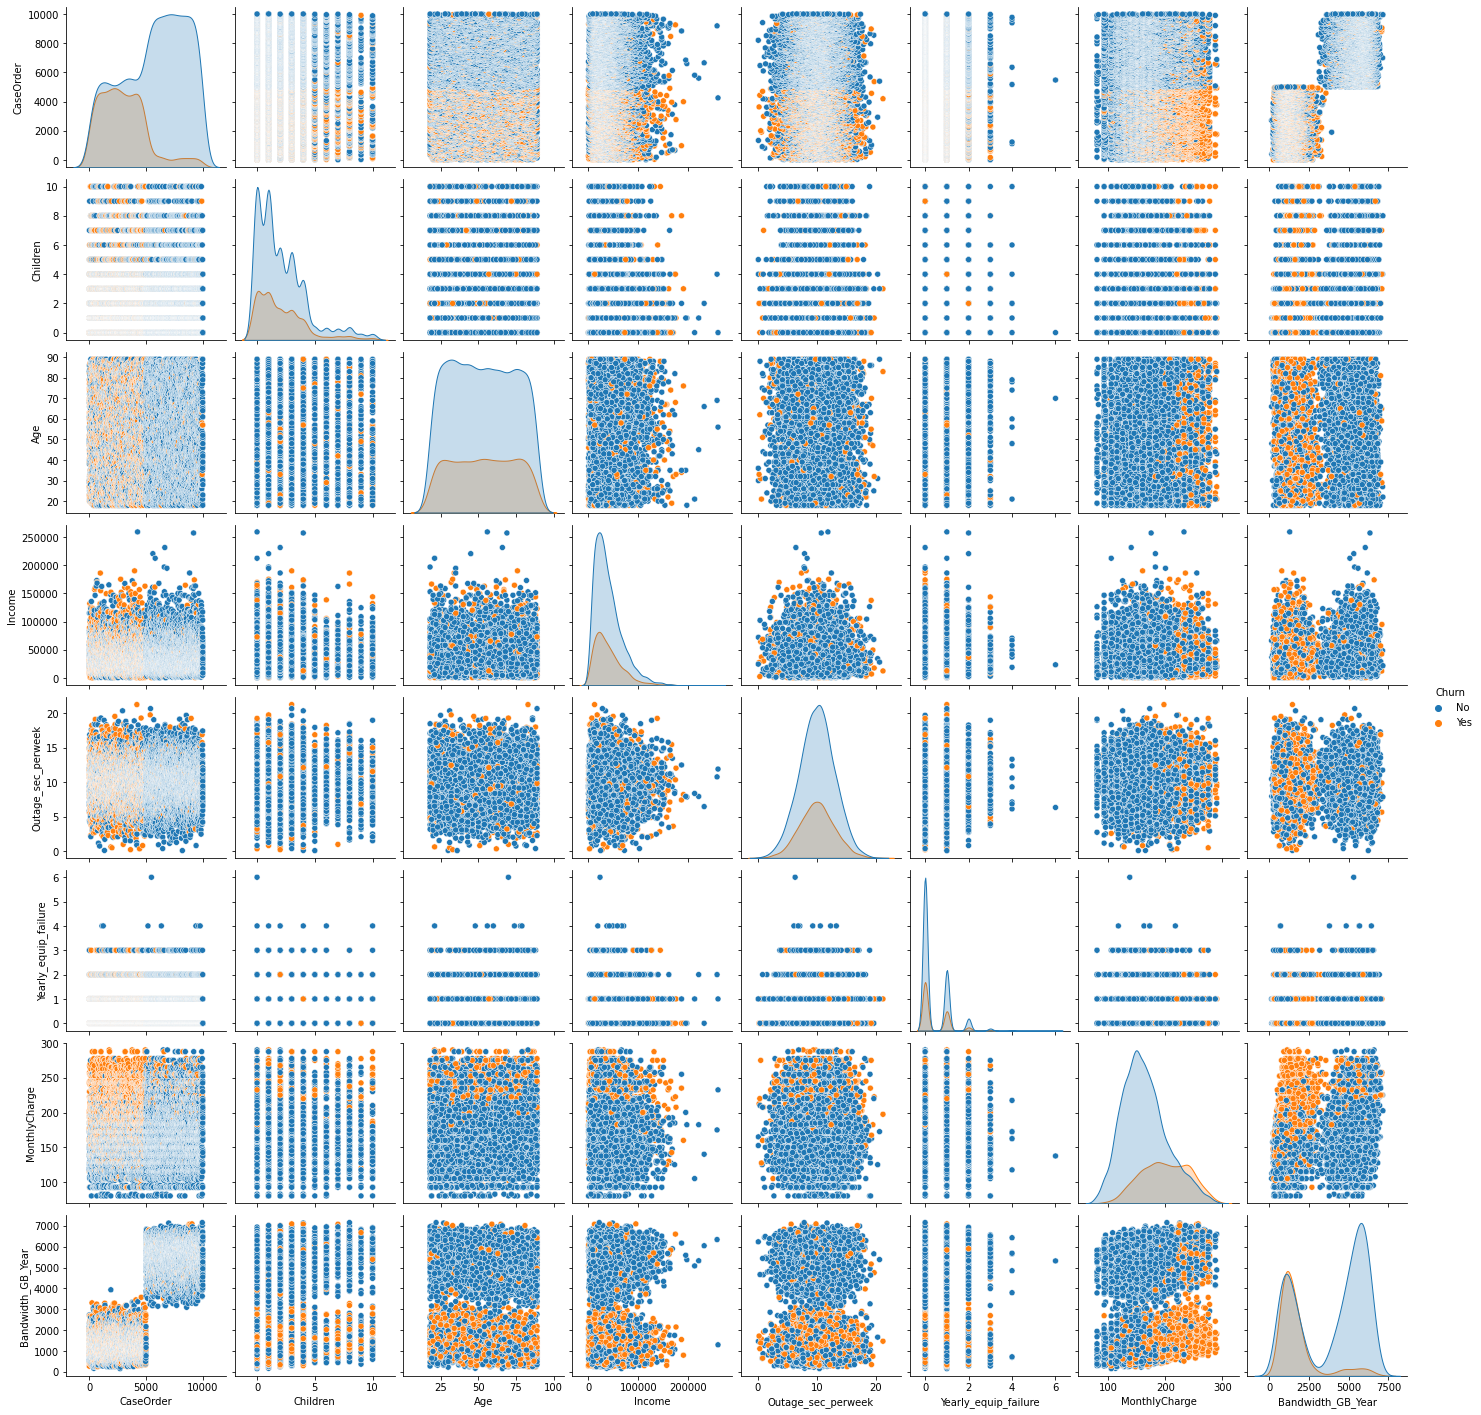

In [5]:
sns.pairplot(df,hue='Churn') 

<AxesSubplot:>

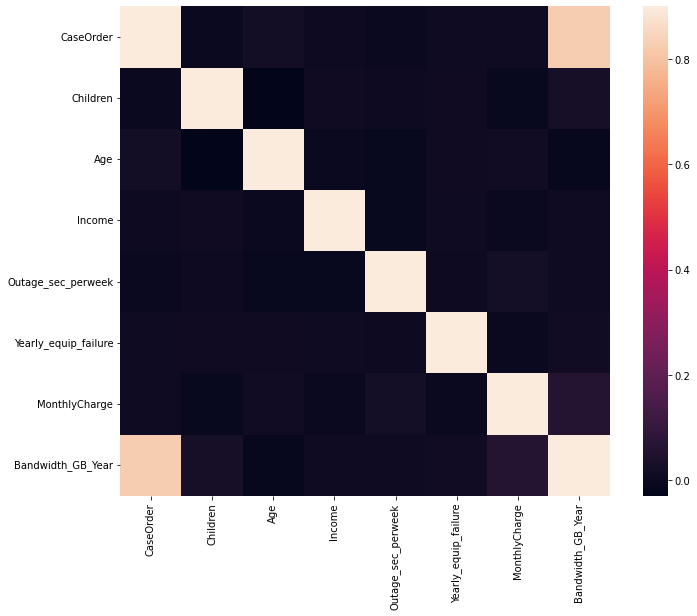

In [6]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
corr_matrix = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

### Recoding the variables that we are using that are not in the format we need for our analysis. Then, view the head to see the changes

In [7]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df.head()

,CaseOrder,Customer_id,Interaction,UID,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,gender_dummy,churn_dummy
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,0,68,28561.99,Male,No,7.978323,1,172.455519,904.536110,0,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,1,27,21704.77,Female,Yes,11.699080,1,242.632554,800.982766,1,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,4,50,9609.57,Female,No,10.752800,1,159.947583,2054.706961,1,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,1,48,18925.23,Male,No,14.913540,0,119.956840,2164.579412,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,0,83,40074.19,Male,Yes,8.147417,1,149.948316,271.493436,0,1


### Univariate Distributions

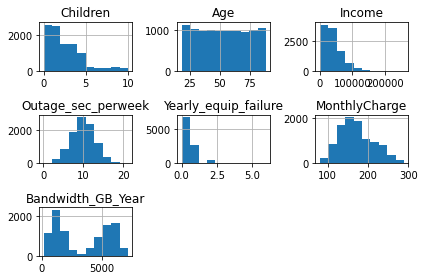

In [8]:
df[['Children', 'Churn', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge',
'Bandwidth_GB_Year']].hist()
plt.tight_layout()

### Bivariate Distributions

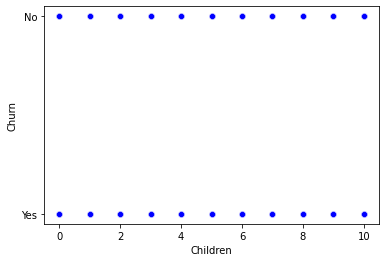

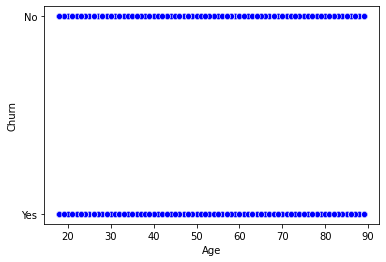

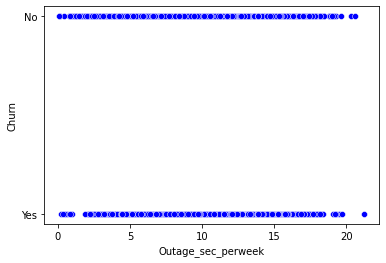

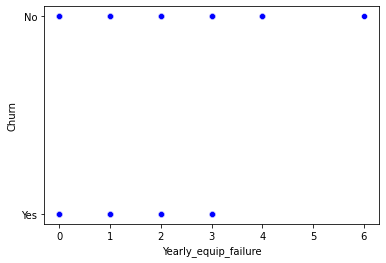

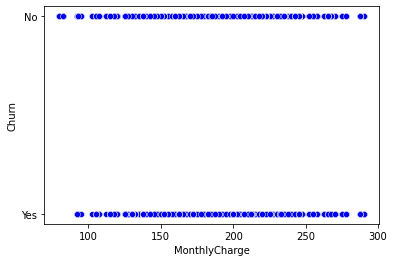

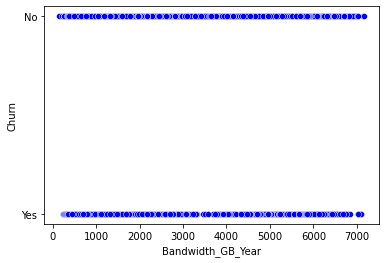

In [9]:
sns.scatterplot(x=df['Children'], y=df['Churn'], color='blue')
plt.show();

sns.scatterplot(x=df['Age'], y=df['Churn'], color='blue')
plt.show();

sns.scatterplot(x=df['Outage_sec_perweek'], y=df['Churn'], color='blue')
plt.show();

sns.scatterplot(x=df['Yearly_equip_failure'], y=df['Churn'], color='blue')
plt.show();

sns.scatterplot(x=df['MonthlyCharge'], y=df['Churn'], color='blue')
plt.show();

sns.scatterplot(x=df['Bandwidth_GB_Year'], y=df['Churn'], color='blue')
plt.show();

# Part 4

### Initial Model

In [10]:
df['Intercept'] = 1
log_reg_results = sm.Logit(df['churn_dummy'], df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.357089
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Sep 2022   Pseudo R-squ.:                  0.3824
Time:                        21:58:10   Log-Likelihood:                -3570.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0170      0.014      1.211      0.226      -0.010       0.044

#### To reduce my model, I eliminated the p-values that were higher than 0.05, statistically insignificant. 

### Reduced Model

In [11]:
df['Intercept'] = 1
log_reg_results2 = sm.Logit(df['churn_dummy'], df[['MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results2.summary())

Optimization terminated successfully.
         Current function value: 0.357282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Sep 2022   Pseudo R-squ.:                  0.3821
Time:                        21:58:31   Log-Likelihood:                -3572.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MonthlyCharge         0.0342      0.001     38.701      0.000       0.032       0.036
Bandwidt

#### Mostly, continuous variables were chosen due to the fact that inferences can be made with lesser numerical variables as opposed to discrete data to make the equivalent inference. Therefore, when it comes to customer churn, it is more accurate. I left gender in there because it was converted into numeric. Furthermore, when having non-numerical data such as demographics and locations, it is sometimes biased and produces innacurate conclusions.

### Export the data set

In [12]:
df.to_csv(r'C:\Users\jesse\Documents\WGU\Predictive Modeling\TASK_2_FINAL_Churn\d208_task2_data.csv')

### Import the new data set

In [13]:
newdf = pd.read_csv(r'C:\Users\jesse\Documents\WGU\Predictive Modeling\TASK_2_FINAL_Churn\d208_task2_data.csv')
print(newdf)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

### Confusion Matrix

In [14]:
matrix_df = pd.read_csv(r'C:\Users\jesse\Documents\WGU\Predictive Modeling\TASK_2_FINAL_Churn\d208_task2_data.csv')

matrix_df = matrix_df[['Children', 'Intercept', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'churn_dummy']]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[1289  197]
 [ 210  304]]


<AxesSubplot:>

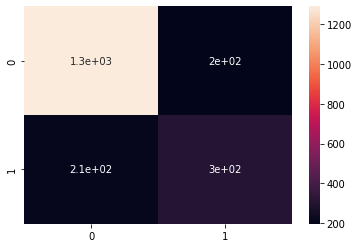

In [19]:
 y_predict_test = classifier.predict(X_test)
new_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(new_matrix, annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1486
           1       0.61      0.59      0.60       514

    accuracy                           0.80      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.79      0.80      0.80      2000



(Reference: geeksforgeeks.org)

# Part 5

Equation for the reduced model:

Y = -4.89 + (0.03*MonthlyCharge) + (-0.008*Bandwdith_GB_year) + (-0.19*gender_dummy)
   
(Reference: stackoverflow.com)

### Conclusion:
Negative relationships: gender_dummy (coefficient: 0.03) and Bandwidth_GB_year (coefficient: -0.008) are both negative in relationships. 
    We can conclude from those negative relationships that females are less likely to churn. Also, the less data used per year means a customer will most likely stay with a provider although the coefficient is extremely slow and may not make much of a difference. MonthlyCharge has a positive coefficient (0.03), which means that the higher the monthly charge/bill, the higher the churn rate. Since churn has yes as 1, this means that every q unit increase in MonthlyCharge means a 0.03 increase in churn. The model its self has an R^2 of 0.38, meaning that it's not effective at predicting new values of churn. Futhermore, the regression line does not fill well. It's not all terrible as 0.38 still has a bit of relevance in predicting. The limitations are not enough information or updates with the dataset, not being able to speak to the person(s) who collected the data, and being able to work with a larger variety of variables. There is not much difference between the initial and the reduced model in terms of significnce, and the R^2 did not increase with the reduced model. The consistancy between the R^2 in both models suggests there are some variables that explain the variation more than others in regards to churn. It was seen that the lower the monthly charge and less data used, the less possibility of churn there is because of the lower monthly charge/bill (Reference: WGU videos and lectures).

### References:
References and code were all acquired through Python libraries, geeksforgeeks.org, statology.org, stackoverflow.com, and WGU videos and lectures from the instructor.